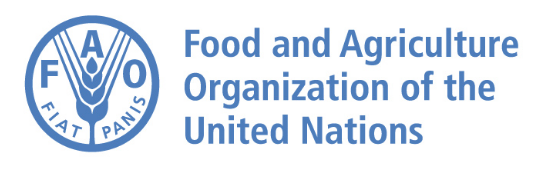

# Projet 4
                                                                                            Sebastián PAULIN

## Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importation des données

In [2]:
df_aide = pd.read_csv('aide_alimentaire.csv')
df_dispo = pd.read_csv('dispo_alimentaire.csv')# Message pour Marc: on a le fichier de 2013, pas de 2017
df_pop = pd.read_csv('population.csv')
df_sous = pd.read_csv('sous_nutrition.csv')

## QC de données

In [3]:
df_dispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df_aide.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

In [5]:
df_dispo.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [6]:
df_pop.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [7]:
df_sous.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

## Questions à répondre
   - La proportion de personnes en état de sous-nutrition ;
   - Le nombre théorique de personnes qui pourraient être nourries. Tu devrais pouvoir calculer ça à partir de la disponibilité alimentaire mondiale ;
   - Idem pour la disponibilité alimentaire des produits végétaux ;
   - L’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine.
   
### Pour Mélanie
   - Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017
   - Ceux qui ont le plus bénéficié d’aide depuis 2013
   - Ceux ayant le plus/le moins de disponibilité/habitant
   
### Julien
   - Le lien logique entre l’ensemble des 10 variables exprimées en milliers de tonnes sur les utilisations de la disponibilité intérieure
   - Des chiffres intéressants sur l’utilisation des céréales, notamment la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux.
   - L'exemple étonnant d’utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition

## Format DataFrame 'Sous-Nutrition'

### Reemplaçer les périodes par des années

In [8]:
df_sous.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [9]:
df_sous["Année"].replace(["2012-2014","2013-2015","2014-2016","2015-2017","2016-2018","2017-2019"],["2013", "2014", "2015", "2016", "2017", "2018"], inplace=True)

In [10]:
df_sous.head()

,Zone,Année,Valeur
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5


### Reemplacer des "<0.1" par des zeros

In [11]:
df_sous.describe()

,Zone,Année,Valeur
count,1218,1218,624
unique,203,6,139
top,Afghanistan,2013,<0.1
freq,6,203,120


In [12]:
df_sous["Valeur"].replace("<0.1", "0", inplace=True)
df_sous['Valeur']=df_sous["Valeur"].astype('float')
df_sous.sort_values(by='Valeur', ascending=False)

,Zone,Année,Valeur
504,Inde,2013,203.8
505,Inde,2014,198.3
506,Inde,2015,193.1
507,Inde,2016,190.9
508,Inde,2017,190.1
...,...,...,...
1213,Zimbabwe,2014,NaN
1214,Zimbabwe,2015,NaN
1215,Zimbabwe,2016,NaN
1216,Zimbabwe,2017,NaN


In [13]:
df_sous.describe()

,Valeur
count,624.000000
mean,5.103846
std,19.450833
min,0.000000
25%,0.275000
50%,1.100000
75%,3.900000
max,203.800000


In [14]:
df_sous[df_sous['Valeur'].isna()]

,Zone,Année,Valeur
24,Allemagne,2013,NaN
25,Allemagne,2014,NaN
26,Allemagne,2015,NaN
27,Allemagne,2016,NaN
28,Allemagne,2017,NaN
...,...,...,...
1213,Zimbabwe,2014,NaN
1214,Zimbabwe,2015,NaN
1215,Zimbabwe,2016,NaN
1216,Zimbabwe,2017,NaN


### Eliminer des valeurs nulls

In [15]:
df_sous.dropna(inplace=True)

In [16]:
df_sous.dtypes

Zone       object
Année      object
Valeur    float64
dtype: object

In [17]:
df_sous[df_sous['Valeur'].isna()]

,Zone,Année,Valeur


## Population Mondiale

In [18]:
pop_2017 = sum(df_pop.loc[df_pop['Année']==2017, 'Valeur'])
print(f'La population Mondial est de {round(pop_2017*1000)} personnes.')

La population Mondial est de 7548134111 personnes.


## Personnes en sous-nutrition (sous-estimé)

In [19]:
sous_2017 = sum(df_sous.loc[df_sous['Année']=="2017", 'Valeur'])

In [20]:
print(f'Les personnes considerées en sous-nutrition pour 2017 est de {round (sous_2017*1000000)} personnes.')

Les personnes considerées en sous-nutrition pour 2017 est de 535700000 personnes.


In [21]:
prop_sous = (((sous_2017*1000)/(pop_2017))*100)
print(f'La proportion de personnes en sous-nutrition pour 2017 est de {round(prop_sous, 2)}%.')

La proportion de personnes en sous-nutrition pour 2017 est de 7.1%.


## Nombre théorique de personnes qui pourraient être nourries

In [22]:
df_dispo.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
mean,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000
max,150000.000000,347309.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,55047.000000,739267.000000,17060.000000,326711.000000,5284.000000


### Reemplacer des valeurs nulls par des zeros

In [23]:
df_dispo['Disponibilité alimentaire (Kcal/personne/jour)'].fillna(0.0)

0         5.0
1         1.0
2         1.0
3         0.0
4         4.0
         ... 
15600    45.0
15601    11.0
15602     0.0
15603     0.0
15604     4.0
Name: Disponibilité alimentaire (Kcal/personne/jour), Length: 15605, dtype: float64

In [24]:
dispo_2013= df_dispo.groupby('Zone').sum()
pd.DataFrame(dispo_2013)

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0
Équateur,1200.0,1909.0,2346.0,544.91,94.64,61.30,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0
États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0


## Fusionnez des données (df_pop + df_dispo)

In [25]:
df_pop_2017 = df_pop.loc[df_pop['Année']==2017]
df_nourr = pd.merge(dispo_2013, df_pop_2017, how='left', on=['Zone'])

In [26]:
df_nourr['dispo_pop_2017']= df_nourr['Valeur']*df_nourr['Disponibilité alimentaire (Kcal/personne/jour)']*1000 #la population es en miliers d'habitants

## Nombre théorique de personnes qui pourraient être nourries avec les aliments disponibles (2500 kcal/jour)

In [27]:
theo_nourr = round(df_nourr['dispo_pop_2017'].sum()/2500)
print (f'Le nombre théorique de personnes qui pourraient être nourries est de {theo_nourr} personnes')

Le nombre théorique de personnes qui pourraient être nourries est de 8367593851 personnes


In [28]:
prop_nourr_2017 = round(theo_nourr/(pop_2017*1000), 2)
print (f'Théoriquement on pourrait nourrir un {round(prop_nourr_2017*100,2)}% de la population mondiale.')

Théoriquement on pourrait nourrir un 111.0% de la population mondiale.


## Nombre théorique de personnes qui pourraient être nourries avec des produit végétaux

In [29]:
df_nourr.head()

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,dispo_pop_2017
0,Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0,2017.0,36296.113,7.574999e+10
1,Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0,2017.0,57009.756,1.721695e+11
2,Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0,2017.0,2884.169,9.194731e+09
3,Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0,2017.0,41389.189,1.362946e+11
4,Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0,2017.0,82658.409,2.895524e+11


In [30]:
df_dispo_veg = df_dispo.loc[df_dispo['Origine']=="vegetale"]
dispo_veg_2013= df_dispo_veg.groupby('Zone').sum()
df_nourr_veg = pd.merge(dispo_veg_2013, df_pop_2017, how='left', on=['Zone'])
df_nourr['dispo_veg_2013']= df_nourr_veg['Valeur']*df_nourr_veg['Disponibilité alimentaire (Kcal/personne/jour)']
theo_nourr_veg = round(df_nourr['dispo_veg_2013'].sum()/2500*1000)
print (f'Le nombre théorique de personnes qui pourraient être nourries avec des vegetales est de {theo_nourr_veg} personnes')

Le nombre théorique de personnes qui pourraient être nourries avec des vegetales est de 6904305685 personnes


In [31]:
prop_nourr_veg_2017 = round(theo_nourr_veg/(pop_2017*1000), 2)
print (f'Théoriquement on pourrait nourrir avec des sources vegetales un {round(prop_nourr_veg_2017*100,2)}% de la population mondiale.')

Théoriquement on pourrait nourrir avec des sources vegetales un 91.0% de la population mondiale.


## Le lien logique entre l’ensemble des 10 variables exprimées en milliers de tonnes sur les utilisations de la disponibilité intérieure
Production + Importations + Variation de stock - Exportation= Disponibilité Int = Nourriture + Pertes + Semences + Traitement + Aut Utilisations + Aliments pour ani.

## L’utilisation de la disponibilité intérieure

In [32]:
tot_ali_ani = df_dispo['Aliments pour animaux'].sum()
aut_uti = df_dispo['Autres Utilisations'].sum()
nour = df_dispo['Nourriture'].sum()
pert = df_dispo['Pertes'].sum()
sem = df_dispo['Semences'].sum()
trai = df_dispo['Traitement'].sum()

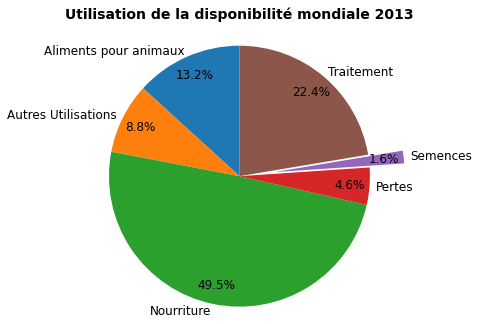

In [33]:
prop_dispo =[tot_ali_ani, aut_uti, nour, pert, sem, trai]
labels=['Aliments pour animaux','Autres Utilisations','Nourriture','Pertes','Semences','Traitement']
explode = (0, 0, 0, 0, 0.4, 0)
plt.pie(prop_dispo, labels=labels, labeldistance=1.05, autopct='%.1f%%', pctdistance=0.85, explode = explode, startangle=90, radius=1.5, textprops={'fontsize': 12})
plt.title("Utilisation de la disponibilité mondiale 2013", fontsize=14, y=1.2, weight='bold')
plt.show()

## Proportion de sous-alimentation en 2017 (Mélanie)

In [34]:
df_sous.dtypes

Zone       object
Année      object
Valeur    float64
dtype: object

In [35]:
df_pop_2017.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [36]:
df_sous['Année'] = df_sous['Année'].astype(int)

In [37]:
df_pop_2017=df_pop_2017.rename(columns = {'Valeur':'Population'})
df_pop_2017.head()

,Zone,Année,Population
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409


In [38]:
df_pop_2017.dtypes

Zone           object
Année           int64
Population    float64
dtype: object

In [39]:
sous_2017= df_sous.loc[df_sous['Année']==2017]
df_sous_2017 = pd.merge(sous_2017, df_pop_2017, how='left', on=['Zone', 'Année'])
df_sous_2017['Proportion']= round(((df_sous_2017['Valeur']*1000000)/(df_sous_2017['Population']*1000))*100, 2)
df_sous_2017.sort_values(by='Proportion', ascending=False).head()

,Zone,Année,Valeur,Population,Proportion
41,Haïti,2017,5.3,10982.366,48.26
82,République populaire démocratique de Corée,2017,12.0,25429.825,47.19
57,Madagascar,2017,10.5,25570.512,41.06
55,Libéria,2017,1.8,4702.226,38.28
53,Lesotho,2017,0.8,2091.534,38.25


[]

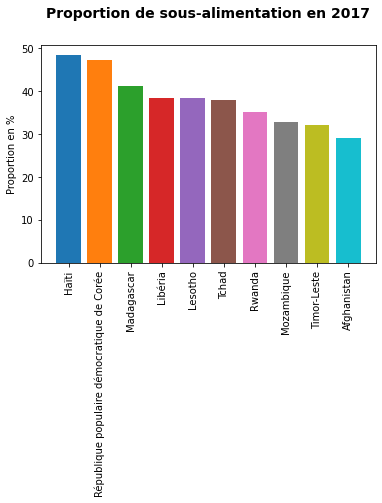

In [40]:
df_sous_rank = df_sous_2017.nlargest(10, 'Proportion')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.bar(height=df_sous_rank['Proportion'], x=df_sous_rank['Zone'], color=colors)
plt.title("Proportion de sous-alimentation en 2017",fontsize=14, y=1.1, weight='bold')
plt.ylabel('Proportion en %')
plt.xticks(rotation=90)
plt.plot()

## Les pays les plus bénéficiés d’aide depuis 2013 (en tonnes de produits)

In [41]:
df_aide.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

In [42]:
df_aide_2013 = df_aide.loc[df_aide['Année']>=2013]
df_aide_2013_list = df_aide_2013.groupby(['Pays bénéficiaire'])['Valeur'].sum().reset_index()
df_aide_rank =df_aide_2013_list.sort_values(by='Valeur',ascending=False).head(10)

In [43]:
df_aide_rank.head()

,Pays bénéficiaire,Valeur
50,République arabe syrienne,1858943
75,Éthiopie,1381294
70,Yémen,1206484
61,Soudan du Sud,695248
60,Soudan,669784


[]

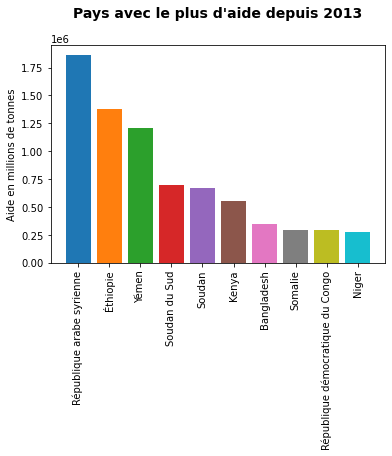

In [44]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.bar(height=df_aide_rank['Valeur'], x=df_aide_rank['Pays bénéficiaire'], color=colors)
plt.title("Pays avec le plus d'aide depuis 2013",fontsize=14, y=1.1, weight='bold')
plt.xticks(rotation=90)
plt.ylabel('Aide en millions de tonnes')
plt.plot()

## Le plus/le moins de disponibilité/habitant par jour (kg de Nourriture)

In [45]:
df_nourr.head()

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,dispo_pop_2017,dispo_veg_2013
0,Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0,2017.0,36296.113,7.574999e+10,6.791003e+07
1,Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0,2017.0,57009.756,1.721695e+11,1.444057e+08
2,Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0,2017.0,2884.169,9.194731e+09,6.353824e+06
3,Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0,2017.0,41389.189,1.362946e+11,1.206495e+08
4,Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0,2017.0,82658.409,2.895524e+11,2.034223e+08


In [46]:
df_nourr['Dispo/personne'] = df_nourr['Nourriture']/(df_nourr['Valeur'])
df_nourr.nlargest(10, 'Dispo/personne').loc[:,["Zone","Dispo/personne"]]

,Zone,Dispo/personne
2,Albanie,1.205200
102,Monténégro,1.198286
59,Grèce,1.127684
72,Irlande,1.119227
88,Lituanie,1.113722
125,Roumanie,1.109089
52,Finlande,1.077409
119,Pays-Bas,1.053031
123,Portugal,1.049810
20,Bosnie-Herzégovine,1.043704


In [47]:
df_nourr.nsmallest(10, 'Dispo/personne').loc[:,["Zone","Dispo/personne"]]

,Zone,Dispo/personne
151,Tchad,0.272829
0,Afghanistan,0.295762
166,Zambie,0.301894
172,Éthiopie,0.313543
56,Gambie,0.316637
165,Yémen,0.329156
62,Guinée-Bissau,0.333125
167,Zimbabwe,0.334490
154,Timor-Leste,0.337018
149,Sénégal,0.345605


## Julien

In [48]:
df_cereales = pd.read_csv('FAO_cereales_3.csv')

In [49]:
df_cereales.head(15)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5521,Aliments pour animaux,S2511,Blé et produits,2013,2013,Milliers de tonnes,326,I,Valeur imputée
1,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5527,Semences,S2511,Blé et produits,2013,2013,Milliers de tonnes,322,I,Valeur imputée
2,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5123,Pertes,S2511,Blé et produits,2013,2013,Milliers de tonnes,775,I,Valeur imputée
3,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5131,Traitement,S2511,Blé et produits,2013,2013,Milliers de tonnes,0,I,Valeur imputée
4,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5170,Résidus,S2511,Blé et produits,2013,2013,Milliers de tonnes,0,I,Valeur imputée
5,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5142,Nourriture,S2511,Blé et produits,2013,2013,Milliers de tonnes,5215,I,Valeur imputée
6,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5521,Aliments pour animaux,S2807,Riz et produits,2013,2013,Milliers de tonnes,9,I,Valeur imputée
7,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5527,Semences,S2807,Riz et produits,2013,2013,Milliers de tonnes,22,I,Valeur imputée
8,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5123,Pertes,S2807,Riz et produits,2013,2013,Milliers de tonnes,36,I,Valeur imputée
9,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5131,Traitement,S2807,Riz et produits,2013,2013,Milliers de tonnes,0,I,Valeur imputée


In [50]:
df_cer_tot=df_cereales.groupby(['Élément','Produit'])['Valeur'].sum().reset_index()
df_cer_tot.sort_values(by='Valeur', ascending=False)


,Élément,Produit,Valeur
33,Nourriture,Riz et produits,753172
12,Aliments pour animaux,Maïs et produits,633352
28,Nourriture,Blé et produits,568297
21,Autres utilisations (non alimentaire),Maïs et produits,218981
30,Nourriture,Maïs et produits,138113
...,...,...,...
7,Alimentation pour touristes,Seigle et produits,0
4,Alimentation pour touristes,Millet et produits,0
45,Résidus,Avoine,-5
53,Résidus,Sorgho et produits,-10


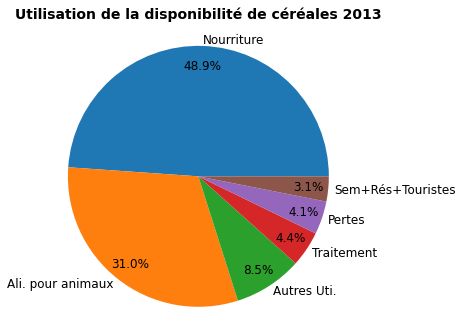

In [51]:
df_cer = pd.DataFrame({'Valeur': [1532211, 971804 , 265809, 138203, 128511, 97355]}, index=['Nourriture', 'Ali. pour animaux', 'Autres Uti.', 'Traitement', 'Pertes', 'Sem+Rés+Touristes'])
df_cer.plot.pie(y='Valeur',labeldistance=1.05, autopct='%.1f%%', pctdistance=0.85, startangle=0, radius=1.5, textprops={'fontsize': 12})
plt.title("Utilisation de la disponibilité de céréales 2013", fontsize=14, y=1.2, weight='bold')
plt.legend('', frameon=False)
plt.ylabel('')
plt.show()

In [52]:
df_manioc = pd.read_csv('FAO_tai_2.csv')
df_manioc_val=df_manioc.sort_values(by='Valeur', ascending=False)

[]

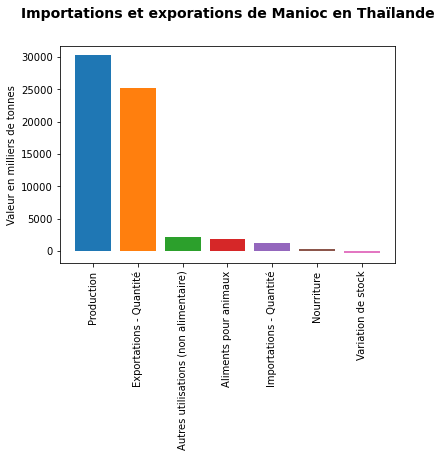

In [53]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#e377c2']
plt.bar(height=df_manioc_val['Valeur'], x=df_manioc_val['Élément'], color=colors)
plt.title("Importations et exporations de Manioc en Thaïlande",fontsize=14, y=1.1, weight='bold')
plt.xticks(rotation=90)
plt.ylabel('Valeur en milliers de tonnes')
plt.plot()

In [54]:
sous_tai = df_sous_2017.loc[df_sous_2017['Zone']=="Thaïlande", 'Valeur'].reset_index()
sous_nut_tai=sous_tai.iloc[0]['Valeur']
print (f'Avec une population de {sous_nut_tai} millions en sous-noutrition, la Thaïlande exporte plus du 80% de sa producition de Manioc.')

Avec une population de 6.2 millions en sous-noutrition, la Thaïlande exporte plus du 80% de sa producition de Manioc.


In [55]:
df_prod_man = pd.read_csv('FAO_prod_tai_2.csv')
df_prod_man.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,SCL,Compte Disponibilités et Utilisations (CDU) (2...,764,Thaïlande,5165,Autres utilisations (non alimentaire),23220.06,Amidon de manioc,2013,2013,tonnes,533756,E,Valeur estimée
1,SCL,Compte Disponibilités et Utilisations (CDU) (2...,764,Thaïlande,5141,Disponibilité alimentaire en quantité (tonnes),23170.01,Farine de manioc,2013,2013,tonnes,82931,E,Valeur estimée
2,SCL,Compte Disponibilités et Utilisations (CDU) (2...,764,Thaïlande,5520,Aliments pour animaux,1520.02,Manioc séché,2013,2013,tonnes,5913,E,Valeur estimée
3,SCL,Compte Disponibilités et Utilisations (CDU) (2...,764,Thaïlande,5520,Aliments pour animaux,1520.01,"Manioc, frais",2013,2013,tonnes,1795877,E,Valeur estimée
4,SCL,Compte Disponibilités et Utilisations (CDU) (2...,764,Thaïlande,5016,Loss,1520.01,"Manioc, frais",2013,2013,tonnes,2274623,I,Valeur imputée


### Utilisations du Manioc en Thaïlande

[]

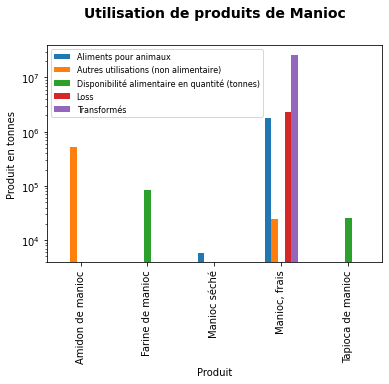

In [56]:
df_prod_man.pivot(index=['Produit'], columns='Élément', values='Valeur').plot(kind='bar')
plt.title("Utilisation de produits de Manioc",fontsize=14, y=1.1, weight='bold')
plt.xticks(rotation=90)
plt.ylabel('Produit en tonnes')
plt.legend(loc='best', prop={'size': 8})
plt.yscale("log")
plt.plot()

### On peut voir que le manioc frais se transforme en autres produits(pour l'alimentation et autres utilisations)